# Energy minimisation
*Cyril Rommens, s12495719, masterproject MSc Physics and Astronomy: Computational Physics of Complex Systems*

**Minimise energy by adjusting the probability distribution using Simulated Annealing**


Give an initial matrix:

In [132]:
test_matrix = np.array([[1, 2, 3], [2, 4, 5], [3, 5, 6]])

In [142]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [145]:
# Import optimisation background functions
%run functionals.py

In [144]:
# Example for generating energy and entropy data from a given matrix
list_size = len(test_matrix)
num_runs = 100
num_iterations_energy = 10000
num_iterations_entropy = 1000
energy_history = []
entropy_history = []

# Run multiple times
for _ in range(num_runs):
    initial_probabilities = generate_probability_list(list_size)

    # Minimum internal energy with simulated annealing
    min_energy = simulated_annealing_energy(initial_probabilities, test_matrix, num_iterations_energy)
    energy_history.append(min_energy)

    # Maximum shannon entropy with simulated annealing
    max_entropy = simulated_annealing_entropy(initial_probabilities, num_iterations_entropy)
    entropy_history.append(max_entropy)

# Generate averaged list of entropy_histories
entropy_history = np.array(entropy_history)
entropy_history_averaged = np.mean(entropy_history, axis=0)

# Generate averaged list of energies_optimization_SA
energy_history = np.array(energy_history)
energy_history_averaged = np.mean(energy_history, axis=0)

C:\Users\cyril\Documents\GitHub\Free_energy_of_simplicial_complexes\functionals.py:32: RuntimeWarning: overflow encountered in exp
  if new_value < current_value or np.random.rand() > np.exp((new_value - current_value) / temperature):


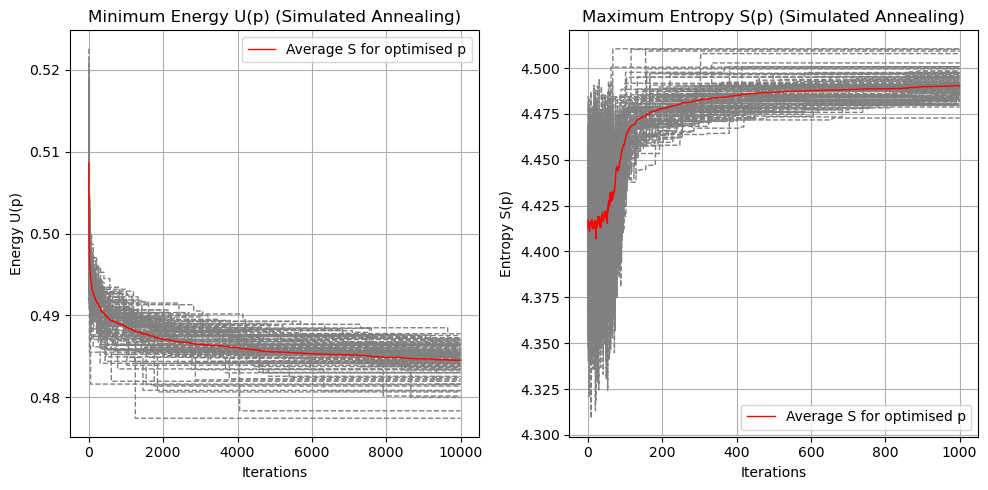

In [103]:
# Plotting the optimisation side by side
plt.figure(figsize=(10, 5))

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

plt.subplot(1, 2, 1)
for i in range(0, len(energy_history)):
    plt.plot(energy_history[i], color='grey', linestyle='--', linewidth=1)
plt.plot(energy_history_averaged, color='red', linestyle='-', linewidth=1, label = 'Average S for optimised p')
plt.title('Minimum Energy U(p) (Simulated Annealing)')
plt.xlabel('Iterations')
plt.ylabel('Energy U(p)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for i in range(0, len(entropy_history)):
    plt.plot(entropy_history[i], color='grey', linestyle='--', linewidth=1)
plt.plot(entropy_history_averaged, color='red', linestyle='-', linewidth=1, label = 'Average S for optimised p')
plt.title('Maximum Entropy S(p) (Simulated Annealing)')
plt.xlabel('Iterations')
plt.ylabel('Entropy S(p)')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Now try for a more realistic size

From the plots above it is shown that the minimum energy and maximum entropy are optimised using the simulated annealing technique. From this, we assume that we can use the simulated annealing method from here on. Now try this method for a large dataset of a size close to the real data.

In [ ]:
def generate_symmetric_binary_matrix(n):
    # Generate a random binary matrix
    random_matrix = np.random.randint(2, size=(n, n))

    # Make the matrix symmetric by taking the upper triangular part and setting it equal to its transpose
    symmetric_matrix = np.triu(random_matrix, 1) + np.triu(random_matrix, 1).T + np.eye(n)

    return symmetric_matrix

test_matrix = generate_symmetric_binary_matrix(100)

In [105]:
# Example for generating energy and entropy data from a given matrix
list_size = len(test_matrix)
num_iterations_energy = 10000
num_iterations_entropy = 1000
initial_probabilities = generate_probability_list(list_size)

# Minimum internal energy with simulated annealing
min_energy = simulated_annealing_energy(initial_probabilities, test_matrix, num_iterations_energy)

# Maximum shannon entropy with simulated annealing
max_entropy = simulated_annealing_entropy(initial_probabilities, num_iterations_entropy)

C:\Users\cyril\AppData\Local\Temp\ipykernel_12600\2028423706.py:27: RuntimeWarning: overflow encountered in exp
  if new_value < current_value or np.random.rand() > np.exp((new_value - current_value) / temperature):


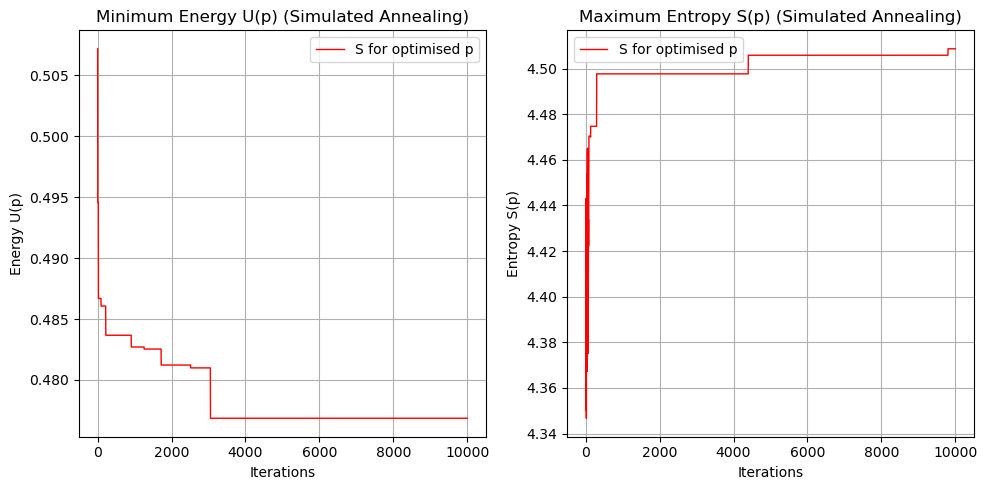

In [106]:
# Plotting the optimisation side by side
plt.figure(figsize=(10, 5))

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

plt.subplot(1, 2, 1)
plt.plot(min_energy, color='red', linestyle='-', linewidth=1, label = 'S for optimised p')
plt.title('Minimum Energy U(p) (Simulated Annealing)')
plt.xlabel('Iterations')
plt.ylabel('Energy U(p)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(max_entropy, color='red', linestyle='-', linewidth=1, label = 'S for optimised p')
plt.title('Maximum Entropy S(p) (Simulated Annealing)')
plt.xlabel('Iterations')
plt.ylabel('Entropy S(p)')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()